In [3]:
import requests
import pandas as pd
import re
from bs4 import BeautifulSoup

In [639]:
import selenium

from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from time import sleep
from selenium.webdriver.common.action_chains import ActionChains


# WIDTH = 320
# HEIGHT = 640
# PIXEL_RATIO = 3.0
# UA = 'Mozilla/5.0 (Linux; Android 4.1.1; GT-N7100 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/35.0.1916.138 Mobile Safari/537.36 T7/6.3'

# mobileEmulation = {"deviceMetrics": {"width": WIDTH, "height": HEIGHT, "pixelRatio": PIXEL_RATIO}, "userAgent": UA}
# options = webdriver.ChromeOptions()
# options.add_experimental_option('mobileEmulation', mobileEmulation)


browser = webdriver.Chrome('/Users/Dennis/chromedriver')
browser.get('https://www.accupass.com/?area=north&channel=0')
js = "var q=document.documentElement.scrollTop=10000"
txs = []
browser.execute_script(js)
# bu = browser.find_element_by_class_name('style-6b76e424-moreButton')
# bu.click()
element = browser.find_element_by_class_name('style-6b76e424-moreButton')
browser.execute_script("arguments[0].click();", element)
sleep(1.5)
tx = browser.page_source
txs.append(tx)
browser.quit()

In [640]:

# WIDTH = 320
# HEIGHT = 640
# PIXEL_RATIO = 3.0
# UA = 'Mozilla/5.0 (Linux; Android 4.1.1; GT-N7100 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/35.0.1916.138 Mobile Safari/537.36 T7/6.3'

# mobileEmulation = {"deviceMetrics": {"width": WIDTH, "height": HEIGHT, "pixelRatio": PIXEL_RATIO}, "userAgent": UA}
# options = webdriver.ChromeOptions()
# options.add_experimental_option('mobileEmulation', mobileEmulation)


browser = webdriver.Chrome('/Users/Dennis/chromedriver')
browser.get('https://www.accupass.com/?area=north&channel=2')
js = "var q=document.documentElement.scrollTop=10000"

browser.execute_script(js)
# bu = browser.find_element_by_class_name('style-6b76e424-moreButton')
# bu.click()
element = browser.find_element_by_class_name('style-6b76e424-moreButton')
browser.execute_script("arguments[0].click();", element)
sleep(1.5)
tx = browser.page_source
txs.append(tx)
browser.quit()

In [641]:

# WIDTH = 320
# HEIGHT = 640
# PIXEL_RATIO = 3.0
# UA = 'Mozilla/5.0 (Linux; Android 4.1.1; GT-N7100 Build/JRO03C) AppleWebKit/537.36 (KHTML, like Gecko) Version/4.0 Chrome/35.0.1916.138 Mobile Safari/537.36 T7/6.3'

# mobileEmulation = {"deviceMetrics": {"width": WIDTH, "height": HEIGHT, "pixelRatio": PIXEL_RATIO}, "userAgent": UA}
# options = webdriver.ChromeOptions()
# options.add_experimental_option('mobileEmulation', mobileEmulation)


browser = webdriver.Chrome('/Users/Dennis/chromedriver')
browser.get('https://www.accupass.com/?area=north&channel=5')
js = "var q=document.documentElement.scrollTop=10000"

browser.execute_script(js)
# bu = browser.find_element_by_class_name('style-6b76e424-moreButton')
# bu.click()
element = browser.find_element_by_class_name('style-6b76e424-moreButton')
browser.execute_script("arguments[0].click();", element)
sleep(1.5)
tx = browser.page_source
txs.append(tx)
browser.quit()

In [657]:
# 用bs4解析
tx = txs[2]

# 沒有提供什麼資訊的
advertise_info = []
all_info = []
for tx in txs:
    soup = BeautifulSoup(tx , 'lxml')
    this_page_articles = soup.find_all(class_='style-60c87c1c-card')
    for article in this_page_articles:
        info = article.text
        #如果說長度等於1，相當於不符合資訊切開
        if article.find(class_ = 'style-4b6f40df-date') ==None:
            advertise_info.append(info)
            continue;
        else:
    #         date_data = info[:25]
    #         start_date = re.findall(r"(\d{4}-\d{1,2}-\d{1,2})",date_data)[0]
    #     #find end_day
    #         end_date = re.findall(r"(\d{4}-\d{1,2}-\d{1,2})",date_data)[1]
            time = article.find(class_ = 'style-4b6f40df-date').text
            views = info.split(' ')[-1]
            collect = info.split(' ')[-2]

            title = article.find(class_ = 'subtitle').text
            try:
                tag = article.find(class_ = 'style-2364952d-tag').text
            except AttributeError:
                tag = 'None'
            span = time.split()
            start = span[0]
            if len(span) > 1:
                end = span[2]
            else:
                end = start
        single_card = [title , tag  , start , end ,views ,collect]
        all_info.append(single_card)    

In [658]:
col_name = ['name' , 'tag' , 'start' , 'end' , 'collect' , 'views']
df = pd.DataFrame(all_info)
df.columns = col_name
df['start_weekday'] =  '週' +  df.start.str[-2]
df.start = df.start.str[:-3]
df['end_weekday'] =  '週' +  df.end.str[-2]
df.end = df.end.str[:-3]
df.start_weekday = df.start_weekday.apply(lambda x:str(x))
df.end_weekday = df.end_weekday.apply(lambda x:str(x))
df.tag = df.tag.str.replace('#' , '')
df = df.drop_duplicates()
df

,name,tag,start,end,collect,views,start_weekday,end_weekday
0,【免費觀念英文課】邏輯文法班 (七月場),英文講座,2019-07-14,2019-07-28,66,2782,週日,週日
1,8/9 (台北) 花見小路-手機旅遊攝影實戰教學,攝影,2019-08-09,2019-08-09,1,426,週五,週五
2,2019台北產品開發者年會 Taipei Product Developers Confer...,設計,2019-09-06,2019-09-07,6,885,週五,週六
3,【北部場】第6屆職務再設計創新工作坊,None,2019-06-29,2019-06-30,8,810,週六,週日
4,律師犀利講堂-婚姻,法律,2019-07-18,2019-09-22,7,2240,週四,週日
5,7/19 Google Analytics網站分析基礎實務｜網站分析必備工具,數據分析,2019-07-19,2019-07-19,21,1368,週五,週五
6,區塊鍊活動精選,虛擬貨幣,2018-12-19,2019-12-31,2019-12-31(二)區塊鍊活動精選#虛擬貨幣,~,週三,週二
7,Download Whitepaper of EvenToken 活動贊助平台項目計畫,Crowdfunding,2018-10-25,2020-01-31,80,3635,週四,週五
8,2019 亞洲區塊鏈高峰會 | Asia Blockchain Summit 2019,政策法規,2019-07-02,2019-07-03,60,4016,週二,週三
9,【ACCUPASS活動好場地】台灣料理研習所,None,2018-10-31,2019-11-01,137,2090,週三,週五


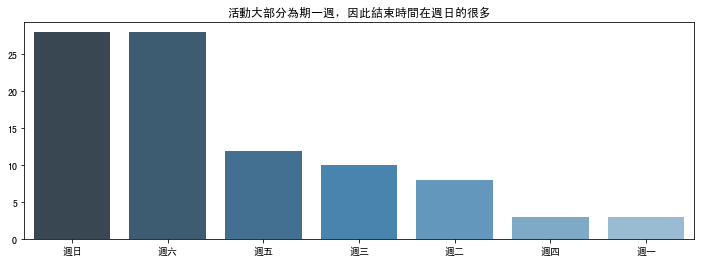

In [663]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (12,4))
# sns.countplot(df.end_weekday)
plt.title('活動大部分為期一週，因此結束時間在週日的很多')
# df.end_weekday.value_counts().plot(kind = 'bar')
counts = df.end_weekday.value_counts().values.tolist()
date = df.end_weekday.value_counts().index.tolist()
sns.barplot(x = date, y = counts,palette="Blues_d")

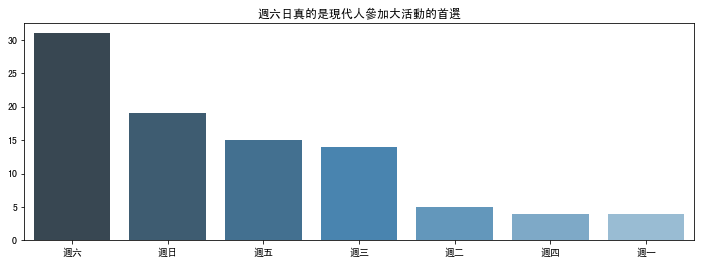

In [664]:
plt.figure(figsize = (12,4))
# sns.countplot(df.end_weekday)
plt.title('週六日真的是現代人參加大活動的首選')
# df.end_weekday.value_counts().plot(kind = 'bar')
counts = df.start_weekday.value_counts().values.tolist()
date = df.start_weekday.value_counts().index.tolist()
sns.barplot(x = date, y = counts,palette="Blues_d")

In [665]:
df.start = pd.to_datetime(df.start)
df.end = pd.to_datetime(df.end)
df['activity_days'] = (df.end - df.start).apply(lambda x:x.days).apply(lambda x : int(x))
df['the_same_day'] = df['activity_days'] 
df['the_same_day'] = df['the_same_day'].map(lambda x:1 if x== 0 else 0)

In [667]:
# 先導入相關套件
import plotly.offline as py
py.init_notebook_mode(connected=True) #為了能在本地端調用
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

labels = ['多日活動' , '單日活動']
values = df.the_same_day.value_counts().values

trace = go.Pie(labels=labels, values=values , title='單、多日活動的比例接近4:6')

py.iplot([trace])

/Users/Dennis/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



count       92.000000
mean      1921.347826
std       5517.590240
min          0.000000
25%        147.000000
50%        414.500000
75%       1357.500000
max      36784.000000
Name: views, dtype: float64

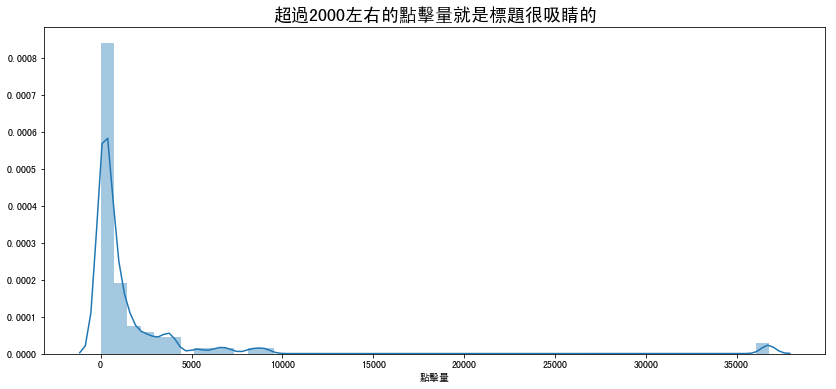

In [668]:
df.views = df.views.map(lambda x:int(x) if x !='~' else 0)
plt.figure(figsize=  (14,6))
plt.title('超過1000左右的點擊量就是標題很吸睛的' ,fontsize= 18)
sns.distplot(df.views)
plt.xlabel('點擊量')
df.views.describe()

大部分的文章基本上還是400多點擊量

In [674]:
df.collect.describe()

count     92.000000
mean      18.228261
std       34.231951
min        0.000000
25%        2.000000
50%        6.000000
75%       15.000000
max      166.000000
Name: collect, dtype: float64

<Figure size 432x288 with 0 Axes>

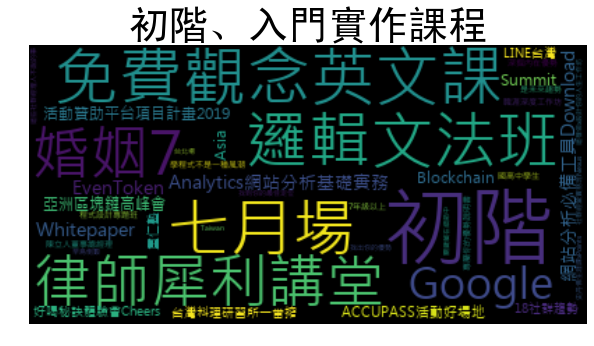

<Figure size 432x288 with 0 Axes>

In [698]:
from wordcloud import WordCloud
df.collect = df.collect.apply(lambda x:int(x) if x !='2019-12-31(二)區塊鍊活動精選#虛擬貨幣' else 0)
hot_activity = df[df.views > 1000]
title  = hot_activity.name.sum()
font_path = '/Users/Dennis/Downloads/微软正黑体.ttf'
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.title('初階、入門實作課程' , fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure()

In [676]:
labels = hot_activity.tag.value_counts().index.tolist()
values = hot_activity.tag.value_counts().values.tolist()
trace = go.Pie(labels=labels, values=values )
layout = go.Layout(
    title=go.layout.Title(
        text='群眾募資、程式設計、個人品牌等應用主題不錯',
        xref='paper'
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
data=  [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

<Figure size 432x288 with 0 Axes>

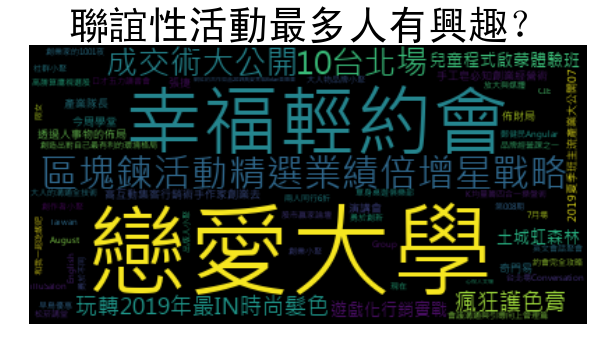

<Figure size 432x288 with 0 Axes>

In [677]:
cold_activity = df[df.views <df.views.quantile(0.25)]
title = cold_activity.name.sum()
wordcloud = WordCloud(font_path=font_path).generate(title)
plt.figure( figsize=(10,8), facecolor='k' ,frameon=False)
plt.title('聯誼性活動最多人有興趣？' , fontsize = 40)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.figure()

In [678]:
labels = cold_activity.tag.value_counts().index.tolist()
values = cold_activity.tag.value_counts().values.tolist()
trace = go.Pie(labels=labels, values=values )
layout = go.Layout(
    title=go.layout.Title(
        text='可以發現民眾較不喜歡比較玄學的東西',
        xref='paper'
#         x=0
    ),
    xaxis=go.layout.XAxis(
        title=go.layout.xaxis.Title(
            text='x Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    ),
    yaxis=go.layout.YAxis(
        title=go.layout.yaxis.Title(
            text='y Axis',
            font=dict(
                family='Courier New, monospace',
                size=18,
                color='#7f7f7f'
            )
        )
    )
)
data=  [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

In [680]:
fig = {
  "data": [
    {
      "values": hot_activity.the_same_day.value_counts().tolist(),
      "labels":['多日活動','單日活動'],
      "domain": {"column": 0},
        "text":['多日活動','單日活動'],
      "name": "熱門活動",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    },
    {
      "values": cold_activity.the_same_day.value_counts().tolist(),
      "labels": ['多日活動','單日活動'],
      "text":['多日活動','單日活動'],
      "textposition":"inside",
      "domain": {"column": 1},
      "name": "冷門活動",
      "hoverinfo":"label+percent+name",
      "hole": .4,
      "type": "pie"
    }],
  "layout": {
        "title":"似乎民眾對為期多天的活動蠻有意願參加（時間彈性？）",
        "grid": {"rows": 1, "columns": 2},
        "annotations": [
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "熱門",
                "x": 0.20,
                "y": 0.5
            },
            {
                "font": {
                    "size": 20
                },
                "showarrow": False,
                "text": "冷門",
                "x": 0.8,
                "y": 0.5
            }
        ]
    }
}
py.iplot(fig)



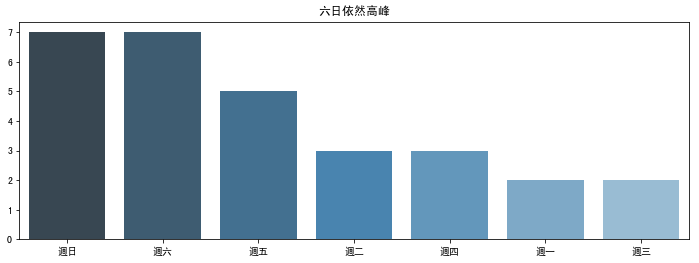

In [682]:
hot_activity.start_weekday.value_counts()
plt.figure(figsize = (12,4))
# sns.countplot(df.end_weekday)
plt.title('六日依然高峰')
# df.end_weekday.value_counts().plot(kind = 'bar')
counts = hot_activity.start_weekday.value_counts().values.tolist()
date = hot_activity.start_weekday.value_counts().index.tolist()
sns.barplot(x = date, y = counts,palette="Blues_d")

In [683]:
hot_activity.sort_values(by = 'collect',ascending=False)

,name,tag,start,end,collect,views,start_weekday,end_weekday,activity_days,the_same_day
52,2019本草派對-SUMMER EDITION,大稻埕,2019-07-05,2019-07-07,166,36784,週五,週日,2,0
53,返校日2:畢業季,畢業季,2019-08-25,2019-08-25,156,1794,週日,週日,0,1
65,聚膠行動#TapeArt全球首展,None,2019-07-13,2019-09-01,155,36723,週六,週日,50,0
9,【ACCUPASS活動好場地】台灣料理研習所,None,2018-10-31,2019-11-01,137,2090,週三,週五,366,0
21,《職涯深度工作坊：專屬你的優勢說明書》深掘內在優勢，找到你的最佳定位(台北場・初階）,個人品牌,2019-07-06,2019-07-07,103,9009,週六,週日,1,0
7,Download Whitepaper of EvenToken 活動贊助平台項目計畫,Crowdfunding,2018-10-25,2020-01-31,80,3635,週四,週五,463,0
0,【免費觀念英文課】邏輯文法班 (七月場),英文講座,2019-07-14,2019-07-28,66,2782,週日,週日,14,0
91,Infinity Japan 2019 日本無極限 藝術展會,藝文,2019-07-26,2019-07-28,61,3825,週五,週日,2,0
8,2019 亞洲區塊鏈高峰會 | Asia Blockchain Summit 2019,政策法規,2019-07-02,2019-07-03,60,4016,週二,週三,1,0
86,【主題讀書會】第107會：自我檢核學習計畫,為你而讀,2019-07-14,2019-07-14,48,1157,週日,週日,0,1


沒什麼固定規律，應該是資料太少了的關係

In [685]:
follow = df.sort_values('collect', ascending=False)
df['active_ratio'] = df.collect/df.views
df.sort_values('active_ratio',ascending=False).head(5)

,name,tag,start,end,collect,views,start_weekday,end_weekday,activity_days,the_same_day,active_ratio
63,【出版人小聚】#7月場 - 鄭健民,甘苦談,2019-07-31,2019-07-31,8,74,週三,週三,0,1,0.108108
34,【遊戲化行銷實戰】高互動集客行銷術,數位行銷,2019-07-19,2019-07-19,2,22,週五,週五,0,1,0.090909
53,返校日2:畢業季,畢業季,2019-08-25,2019-08-25,156,1794,週日,週日,0,1,0.086957
9,【ACCUPASS活動好場地】台灣料理研習所,None,2018-10-31,2019-11-01,137,2090,週三,週五,366,0,0.065550
77,【創業小聚#103】創業家的1001夜--勇於不同、勇於創新！早鳥優惠&兩人同行6折！,startup,2019-07-24,2019-07-25,2,32,週三,週四,1,0,0.062500


值得注意的是
1. 職場甘苦談的主題似乎不錯


2. 數位行銷有意願參加的人很高！active ratio達到10%

我們可以找出這篇活動，看看他的

<b>文案、圖片有什麼吸引人的地方</b>

為什麼這麼多人想參加？

3. 配合時節（畢業季）舉辦的體驗活動效果不錯